In [1]:
#connect to google drive
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks


In [ ]:
import os

# Get the current working directory
current_directory = os.getcwd()

print("Current Working Directory:", current_directory)

Current Working Directory: c:\Users\madal\Desktop\MSc-Data-Science\Thesis


In [2]:
#import the packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import f1_score, precision_recall_curve, auc
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import average_precision_score


In [ ]:
#learning curve function
def plot_learning_curve(model, X, y, scoring, train_sizes):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring=scoring, train_sizes=train_sizes
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()
    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

In [3]:
#set random seed
np.random.seed(42)

In [ ]:
#import the data

#X_train_resampled = pd.read_csv('X_train_transformed_smote.csv')
X_valid_transformed = pd.read_csv('X_valid_transformed_basicfull.csv')
X_test_transformed = pd.read_csv('X_test_transformed_basicfull.csv')

#y_train_resampled = pd.read_csv('y_train_smote.csv')
y_valid = pd.read_csv('y_valid_basicfull.csv')
y_test = pd.read_csv('y_test_basicfull.csv')
#y_train_resampled = np.ravel(y_train_resampled.values)
y_valid = np.ravel(y_valid.values)
y_test = np.ravel(y_test.values)

In [ ]:
#convert arrays to pandas df
X_train_df = pd.DataFrame(X_train_resampled)
X_valid_df = pd.DataFrame(X_valid_transformed)

#get the columns/features of each dataset
features_train = set(X_train_df.columns)
features_valid = set(X_valid_df.columns)

#check if the features are the same
if features_train == features_valid:
    print("Number of features is the same in training and validation sets.")
else:
    print("Number of features is different in training and validation sets.")

Number of features is the same in training and validation sets.


In [ ]:

dt_classifier = DecisionTreeClassifier(random_state=42)

#parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    #'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'] #auto is deprecated
}

random_search = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=5,
    cv=3,
    scoring='f1_macro',
    verbose=2,
    random_state=42
)

random_search.fit(X_train_resampled, y_train_resampled)

# Step 4: Print the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters DT SMOTE:", best_params)

# Step 5: Train the Decision Tree classifier with the best hyperparameters
best_dt_classifier = DecisionTreeClassifier(**best_params, random_state=42)
best_dt_classifier.fit(X_train_resampled, y_train_resampled)

# Step 6: Evaluate the classifier on the test set
y_pred = best_dt_classifier.predict(X_valid_transformed)

#save model to a file
joblib.dump(best_dt_classifier, 'dt_smote.pkl')

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=  10.5s
[CV] END criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=  11.0s
[CV] END criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=  11.0s
[CV] END criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   7.1s
[CV] END criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   7.2s
[CV] END criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   6.6s
[CV] END criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   9.3s
[CV] END criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=  10.3s
[CV] END criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_sp

['dt_smote.pkl']

In [ ]:
best_dt_classifier = joblib.load('dt_smote.pkl')

In [ ]:
y_pred = best_dt_classifier.predict(X_valid_transformed)

In [ ]:
f1 = f1_score(y_valid, y_pred, average = "weighted")
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.9787


In [ ]:
f1 = f1_score(y_valid, y_pred, average = "macro")
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.5342


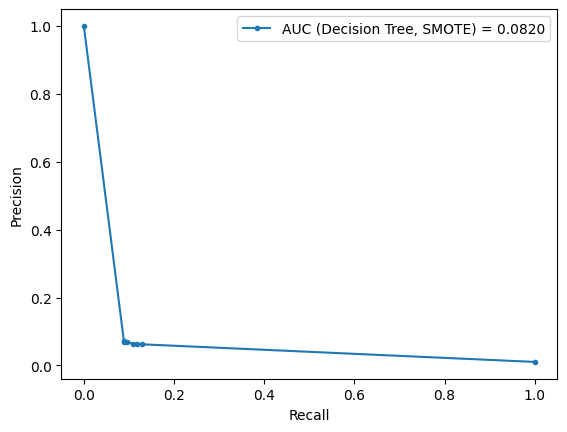

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Assuming y_valid and probabilities are available
y_valid =  y_valid
probabilities = best_dt_classifier.predict_proba(X_valid_transformed)[:, 1]  # Probabilities of the positive class

# Calculate the "No Skill" precision

# Calculate precision-recall pairs
precision_dt, recall_dt, _ = precision_recall_curve(y_valid, probabilities)
auc_dt = auc(recall_dt, precision_dt)

# Plot the precision-recall curve

plt.plot(recall_dt, precision_dt, marker=".", label=f"AUC (Decision Tree, SMOTE) = {auc_dt:.4f}")

# Axis labels
plt.xlabel("Recall")
plt.ylabel("Precision")

# Show the legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
class_report = classification_report(y_valid, y_pred)

# Print F1 scores per class
for line in class_report.split('\n')[2:-1]:
    row = line.split()
    if len(row) > 1:
        class_label = row[0]
        f1 = float(row[-2])
        print(f"Class {class_label}: F1 Score = {f1:.2f}")

Class 0: F1 Score = 0.99
Class 1: F1 Score = 0.08
Class accuracy: F1 Score = 0.98
Class macro: F1 Score = 0.53
Class weighted: F1 Score = 0.98


In [ ]:
##confusion matrix & classification report
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred))

print("\nClassification Report:")
print(classification_report(y_valid, y_pred))

Confusion Matrix:
[[156123   2201]
 [  1514    162]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    158324
           1       0.07      0.10      0.08      1676

    accuracy                           0.98    160000
   macro avg       0.53      0.54      0.53    160000
weighted avg       0.98      0.98      0.98    160000



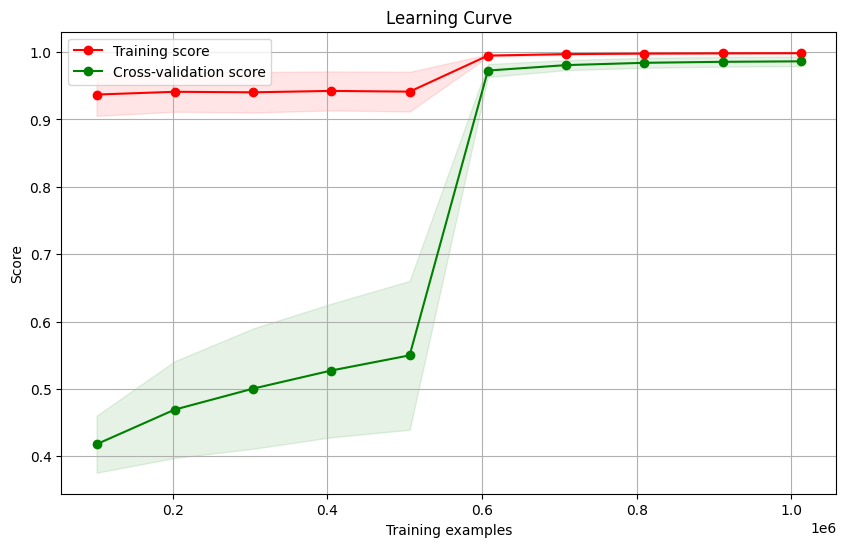

In [ ]:
train_sizes = np.linspace(0.1, 1.0, 10)
scoring = "f1_macro"
plot_learning_curve(best_dt_classifier, X_train_resampled, y_train_resampled, scoring, train_sizes)

In [ ]:
##confusion matrix & classification report
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred))

print("\nClassification Report:")
print(classification_report(y_valid, y_pred))


Confusion Matrix:
[[156123   2201]
 [  1514    162]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    158324
           1       0.07      0.10      0.08      1676

    accuracy                           0.98    160000
   macro avg       0.53      0.54      0.53    160000
weighted avg       0.98      0.98      0.98    160000



In [ ]:
##custom scorer

#obtain predicted probabilities for the positive class from the model
y_prob = best_dt_classifier.predict_proba(X_valid_transformed)[:, 1]

#make a list of touples with predicted probabilities and true labels in descending order
sorted_probs = sorted(zip(y_prob, y_valid), key=lambda x: x[0], reverse=True)

#calculate cumulative sum of true positives
cumulative_tp = [0] + list(np.cumsum([y == 1 for _, y in sorted_probs]))

#find the threshold where cumulative TP is closest to 90%
target_cumulative_tp = int(0.9 * cumulative_tp[-1])
threshold = next(prob for prob, _ in sorted_probs if cumulative_tp[np.searchsorted(cumulative_tp, target_cumulative_tp)] >= target_cumulative_tp) #find the threshold value where the cumulative TP is the closest to the target cumulative TP

#applu the threshold to classify positive and negative instances
y_pred = (y_prob >= threshold).astype(int) #astype to convert booleans to 0 and 1

#evaluate the model using the chosen threshold
conf_matrix = confusion_matrix(y_valid, y_pred)
fpr = conf_matrix[0, 1] / (conf_matrix[0, 1] + conf_matrix[0, 0])
recall = recall_score(y_valid, y_pred)

print(f"Chosen threshold: {threshold}")
print(f"False Positive Rate: {fpr}")
print(f"Recall: {recall}")
print(conf_matrix)


Chosen threshold: 1.0
False Positive Rate: 0.012196508425759834
Recall: 0.08890214797136038
[[156393   1931]
 [  1527    149]]


In [ ]:
##DT with adasyn
X_train_resampled = pd.read_csv('X_train_transformed_adasyn.csv')

y_train_resampled = pd.read_csv('y_train_adasyn.csv')

y_train_resampled = np.ravel(y_train_resampled.values)

In [ ]:
#convert arrays to pandas df
X_train_df = pd.DataFrame(X_train_resampled)
X_valid_df = pd.DataFrame(X_valid_transformed)

#get the columns/features of each dataset
features_train = set(X_train_df.columns)
features_valid = set(X_valid_df.columns)

#check if the features are the same
if features_train == features_valid:
    print("Number of features is the same in training and validation sets.")
else:
    print("Number of features is different in training and validation sets.")

Number of features is the same in training and validation sets.


In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42)

#parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'] #auto is deprecated
}

random_search = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=5,
    cv=3,
    scoring='f1_macro',
    verbose=2,
    random_state=42
)

random_search.fit(X_train_resampled, y_train_resampled)

# Step 4: Print the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters DT ADASYN:", best_params)

# Step 5: Train the Decision Tree classifier with the best hyperparameters
best_dt_classifier = DecisionTreeClassifier(**best_params, random_state=42)
best_dt_classifier.fit(X_train_resampled, y_train_resampled)

# Step 6: Evaluate the classifier on the test set
y_pred = best_dt_classifier.predict(X_valid_transformed)

#save model to a file
joblib.dump(best_dt_classifier, 'dt_adasyn.pkl')

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   9.1s
[CV] END criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   9.4s
[CV] END criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   9.2s
[CV] END criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   5.9s
[CV] END criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   6.5s
[CV] END criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   6.6s
[CV] END criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   8.6s
[CV] END criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   9.8s
[CV] END criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_sp

['dt_adasyn.pkl']

In [ ]:
best_dt_classifier = joblib.load('dt_adasyn.pkl')
y_pred = best_dt_classifier.predict(X_valid_transformed)

In [ ]:
f1 = f1_score(y_valid, y_pred, average = "weighted")
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.9780


In [ ]:
f1 = f1_score(y_valid, y_pred, average = "macro")
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.5346


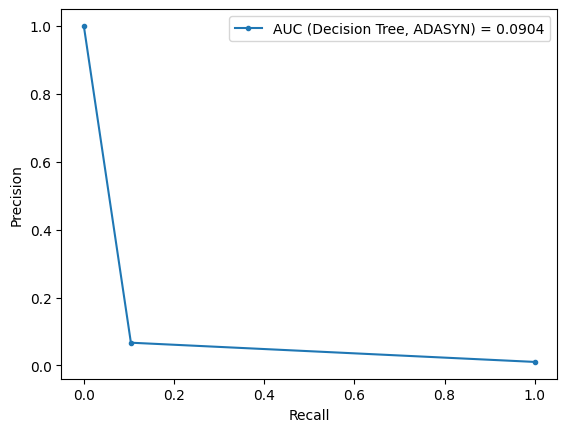

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Assuming y_valid and probabilities are available
y_valid =  y_valid
probabilities = best_dt_classifier.predict_proba(X_valid_transformed)[:, 1]  # Probabilities of the positive class

# Calculate the "No Skill" precision

# Calculate precision-recall pairs
precision_dt, recall_dt, _ = precision_recall_curve(y_valid, probabilities)
auc_dt = auc(recall_dt, precision_dt)

# Plot the precision-recall curve

plt.plot(recall_dt, precision_dt, marker=".", label=f"AUC (Decision Tree, ADASYN) = {auc_dt:.4f}")

# Axis labels
plt.xlabel("Recall")
plt.ylabel("Precision")

# Show the legend
plt.legend()

# Show the plot
plt.show()


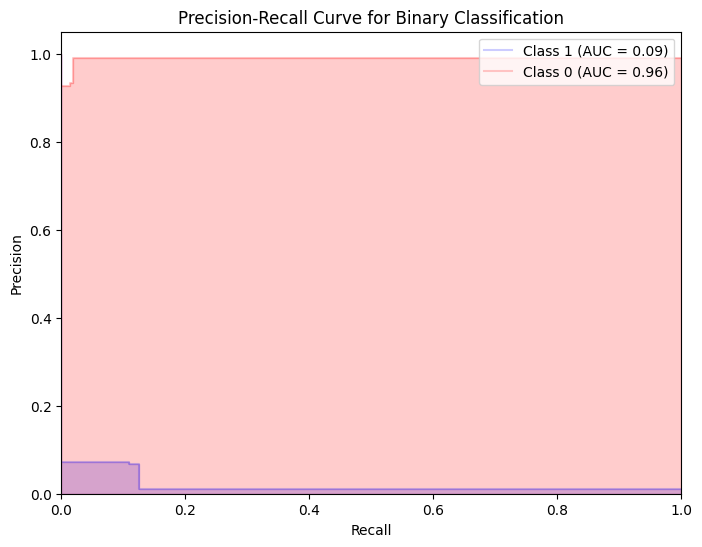

AUC Class 1: 0.0937
AUC Class 0: 0.9610


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Assuming y_valid is the true labels and X_valid_transformed is the transformed validation data

# Calculate precision-recall curve for class 1
precision_class1, recall_class1, _ = precision_recall_curve(y_valid, best_dt_classifier.predict_proba(X_valid_transformed)[:, 1])
auc_score_class1 = auc(recall_class1, precision_class1)

# Calculate precision-recall curve for class 0
precision_class0, recall_class0, _ = precision_recall_curve(1 - y_valid, 1 - best_dt_classifier.predict_proba(X_valid_transformed)[:, 0])  # Invert labels for class 0
auc_score_class0 = auc(recall_class0, precision_class0)

# Plot the precision-recall curves
plt.figure(figsize=(8, 6))

# Plot precision-recall curve for class 1
plt.step(recall_class1, precision_class1, color='b', alpha=0.2, where='post', label=f'Class 1 (AUC = {auc_score_class1:.2f})')
plt.fill_between(recall_class1, precision_class1, step='post', alpha=0.2, color='b')

# Plot precision-recall curve for class 0
plt.step(recall_class0, precision_class0, color='r', alpha=0.2, where='post', label=f'Class 0 (AUC = {auc_score_class0:.2f})')
plt.fill_between(recall_class0, precision_class0, step='post', alpha=0.2, color='r')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve for Binary Classification')
plt.legend(loc='upper right')
plt.show()

print(f"AUC Class 1: {auc_score_class1:.4f}")
print(f"AUC Class 0: {auc_score_class0:.4f}")

In [ ]:


average_precision = average_precision_score(y_valid, y_pred)

print(f'Area Under the Precision-Recall Curve (AUC-PR): {average_precision:.4f}')

Area Under the Precision-Recall Curve (AUC-PR): 0.0173


In [ ]:
class_report = classification_report(y_valid, y_pred)

# Print F1 scores per class
for line in class_report.split('\n')[2:-1]:
    row = line.split()
    if len(row) > 1:
        class_label = row[0]
        f1 = float(row[-2])
        print(f"Class {class_label}: F1 Score = {f1:.2f}")

Class 0: F1 Score = 0.99
Class 1: F1 Score = 0.09
Class accuracy: F1 Score = 0.98
Class macro: F1 Score = 0.54
Class weighted: F1 Score = 0.98


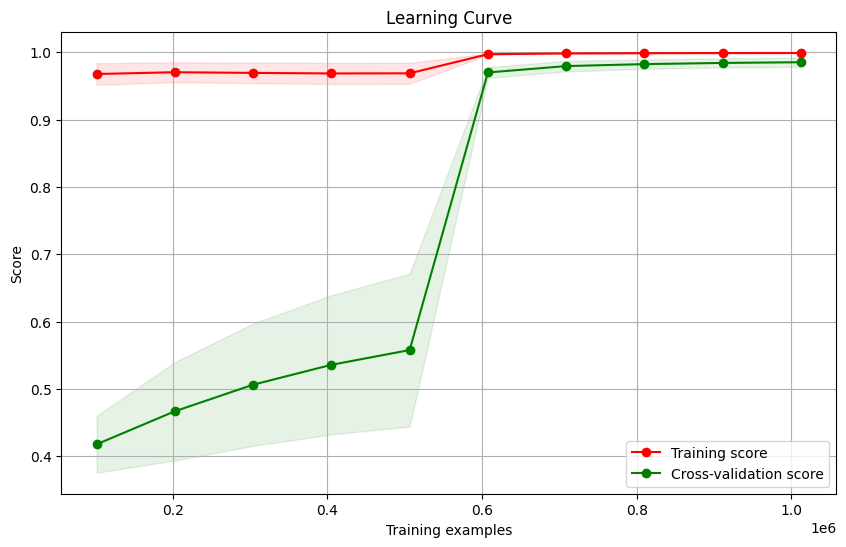

In [ ]:
train_sizes = np.linspace(0.1, 1.0, 10)
scoring = "f1_macro"
plot_learning_curve(best_dt_classifier, X_train_resampled, y_train_resampled, scoring, train_sizes)

In [ ]:
##custom scorer

#obtain predicted probabilities for the positive class from the model
y_prob = best_dt_classifier.predict_proba(X_valid_transformed)[:, 1]

#make a list of touples with predicted probabilities and true labels in descending order
sorted_probs = sorted(zip(y_prob, y_valid), key=lambda x: x[0], reverse=True)

#calculate cumulative sum of true positives
cumulative_tp = [0] + list(np.cumsum([y == 1 for _, y in sorted_probs]))

#find the threshold where cumulative TP is closest to 90%
target_cumulative_tp = int(0.9 * cumulative_tp[-1])
threshold = next(prob for prob, _ in sorted_probs if cumulative_tp[np.searchsorted(cumulative_tp, target_cumulative_tp)] >= target_cumulative_tp) #find the threshold value where the cumulative TP is the closest to the target cumulative TP

#applu the threshold to classify positive and negative instances
y_pred = (y_prob >= threshold).astype(int) #astype to convert booleans to 0 and 1

#evaluate the model using the chosen threshold
conf_matrix = confusion_matrix(y_valid, y_pred)
fpr = conf_matrix[0, 1] / (conf_matrix[0, 1] + conf_matrix[0, 0])

print(f"Chosen threshold: {threshold}")
print(f"False Positive Rate: {fpr}")

print(conf_matrix)

Chosen threshold: 1.0
False Positive Rate: 0.01474823779085925
[[155989   2335]
 [  1493    183]]


In [ ]:
###DT with random undersampling

X_train_undersampled = pd.read_csv('X_train_random_undersampl.csv')

y_train_undersampled = pd.read_csv('y_train_random_undersampl.csv')

y_train_undersampled = np.ravel(y_train_undersampled.values)

In [ ]:
#convert arrays to pandas df
X_train_df = pd.DataFrame(X_train_undersampled)
X_valid_df = pd.DataFrame(X_valid_transformed)

#get the columns/features of each dataset
features_train = set(X_train_df.columns)
features_valid = set(X_valid_df.columns)

#check if the features are the same
if features_train == features_valid:
    print("Number of features is the same in training and validation sets.")
else:
    print("Number of features is different in training and validation sets.")

Number of features is the same in training and validation sets.


In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42)

#parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'] #auto is deprecated
}

random_search = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=5,
    cv=3,
    scoring='f1_macro',
    verbose=2,
    random_state=42
)

random_search.fit(X_train_undersampled, y_train_undersampled)

# Step 4: Print the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters DT random undersampling:", best_params)

# Step 5: Train the Decision Tree classifier with the best hyperparameters
best_dt_classifier = DecisionTreeClassifier(**best_params, random_state=42)
best_dt_classifier.fit(X_train_undersampled, y_train_undersampled)

# Step 6: Evaluate the classifier on the test set
y_pred = best_dt_classifier.predict(X_valid_transformed)

#save model to a file
joblib.dump(best_dt_classifier, 'dt_random_undersampling.pkl')

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_sp

['dt_random_undersampling.pkl']

In [ ]:
best_dt_classifier = joblib.load('dt_random_undersampling.pkl')
y_pred = best_dt_classifier.predict(X_valid_transformed)

In [ ]:
f1 = f1_score(y_valid, y_pred, average = "macro")
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.4459


In [ ]:
f1 = f1_score(y_valid, y_pred, average = "weighted")
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.8335


In [ ]:
##confusion matrix & classification report
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred))

print("\nClassification Report:")
print(classification_report(y_valid, y_pred))

Confusion Matrix:
[[115463  42861]
 [   535   1141]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.73      0.84    158324
           1       0.03      0.68      0.05      1676

    accuracy                           0.73    160000
   macro avg       0.51      0.71      0.45    160000
weighted avg       0.99      0.73      0.83    160000



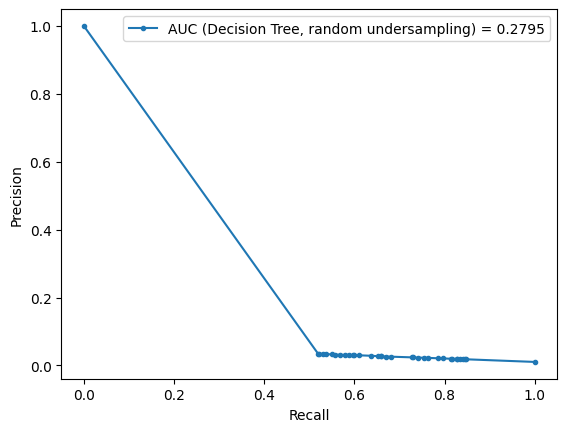

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Assuming y_valid and probabilities are available
y_valid =  y_valid
probabilities = best_dt_classifier.predict_proba(X_valid_transformed)[:, 1]  # Probabilities of the positive class

# Calculate the "No Skill" precision

# Calculate precision-recall pairs
precision_dt, recall_dt, _ = precision_recall_curve(y_valid, probabilities)
auc_dt = auc(recall_dt, precision_dt)

# Plot the precision-recall curve

plt.plot(recall_dt, precision_dt, marker=".", label=f"AUC (Decision Tree, random undersampling) = {auc_dt:.4f}")

# Axis labels
plt.xlabel("Recall")
plt.ylabel("Precision")

# Show the legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
average_precision = average_precision_score(y_valid, y_pred)
print(f'Area Under the Precision-Recall Curve (AUC-PR): {average_precision:.4f}')

Area Under the Precision-Recall Curve (AUC-PR): 0.0255


In [ ]:
class_report = classification_report(y_valid, y_pred)

# Print F1 scores per class
for line in class_report.split('\n')[2:-1]:
    row = line.split()
    if len(row) > 1:
        class_label = row[0]
        f1 = float(row[-2])
        print(f"Class {class_label}: F1 Score = {f1:.2f}")


Class 0: F1 Score = 0.86
Class 1: F1 Score = 0.06
Class accuracy: F1 Score = 0.76
Class macro: F1 Score = 0.46
Class weighted: F1 Score = 0.85


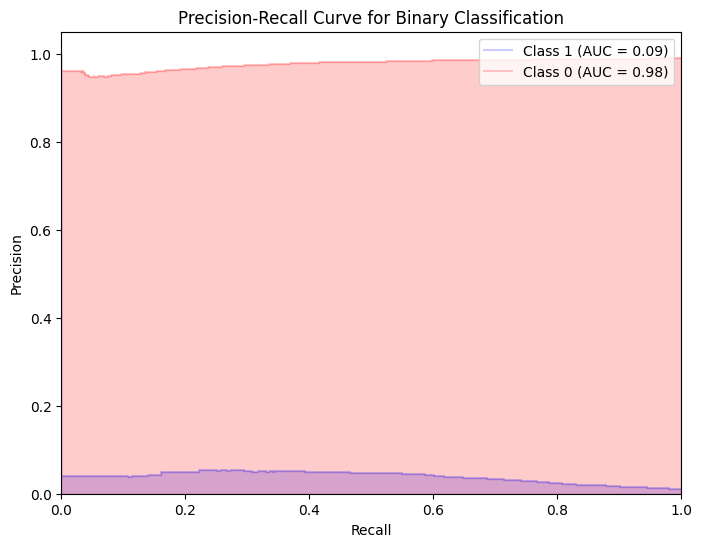

AUC Class 1: 0.0895
AUC Class 0: 0.9775


In [ ]:
# Calculate precision-recall curve for class 1
precision_class1, recall_class1, _ = precision_recall_curve(y_valid, best_dt_classifier.predict_proba(X_valid_transformed)[:, 1])
auc_score_class1 = auc(recall_class1, precision_class1)

# Calculate precision-recall curve for class 0
precision_class0, recall_class0, _ = precision_recall_curve(1 - y_valid, 1 - best_dt_classifier.predict_proba(X_valid_transformed)[:, 0])  # Invert labels for class 0
auc_score_class0 = auc(recall_class0, precision_class0)

# Plot the precision-recall curves
plt.figure(figsize=(8, 6))

# Plot precision-recall curve for class 1
plt.step(recall_class1, precision_class1, color='b', alpha=0.2, where='post', label=f'Class 1 (AUC = {auc_score_class1:.2f})')
plt.fill_between(recall_class1, precision_class1, step='post', alpha=0.2, color='b')

# Plot precision-recall curve for class 0
plt.step(recall_class0, precision_class0, color='r', alpha=0.2, where='post', label=f'Class 0 (AUC = {auc_score_class0:.2f})')
plt.fill_between(recall_class0, precision_class0, step='post', alpha=0.2, color='r')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve for Binary Classification')
plt.legend(loc='upper right')
plt.show()

print(f"AUC Class 1: {auc_score_class1:.4f}")
print(f"AUC Class 0: {auc_score_class0:.4f}")

In [ ]:
##custom scorer

#obtain predicted probabilities for the positive class from the model
y_prob = best_dt_classifier.predict_proba(X_valid_transformed)[:, 1]

#make a list of touples with predicted probabilities and true labels in descending order
sorted_probs = sorted(zip(y_prob, y_valid), key=lambda x: x[0], reverse=True)

#calculate cumulative sum of true positives
cumulative_tp = [0] + list(np.cumsum([y == 1 for _, y in sorted_probs]))

#find the threshold where cumulative TP is closest to 90%
target_cumulative_tp = int(0.9 * cumulative_tp[-1])
threshold = next(prob for prob, _ in sorted_probs if cumulative_tp[np.searchsorted(cumulative_tp, target_cumulative_tp)] >= target_cumulative_tp) #find the threshold value where the cumulative TP is the closest to the target cumulative TP

#applu the threshold to classify positive and negative instances
y_pred = (y_prob >= threshold).astype(int) #astype to convert booleans to 0 and 1

#evaluate the model using the chosen threshold
conf_matrix = confusion_matrix(y_valid, y_pred)
fpr = conf_matrix[0, 1] / (conf_matrix[0, 1] + conf_matrix[0, 0])
recall = recall_score(y_valid, y_pred)

print(f"Chosen threshold: {threshold}")
print(f"False Positive Rate: {fpr}")
print(f"Recall: {recall}")
print(conf_matrix)



Chosen threshold: 1.0
False Positive Rate: 0.027664788661226347
Recall: 0.10739856801909307
[[153944   4380]
 [  1496    180]]


In [ ]:
#best_dt = joblib.load('dt_random_undersampling.pkl')

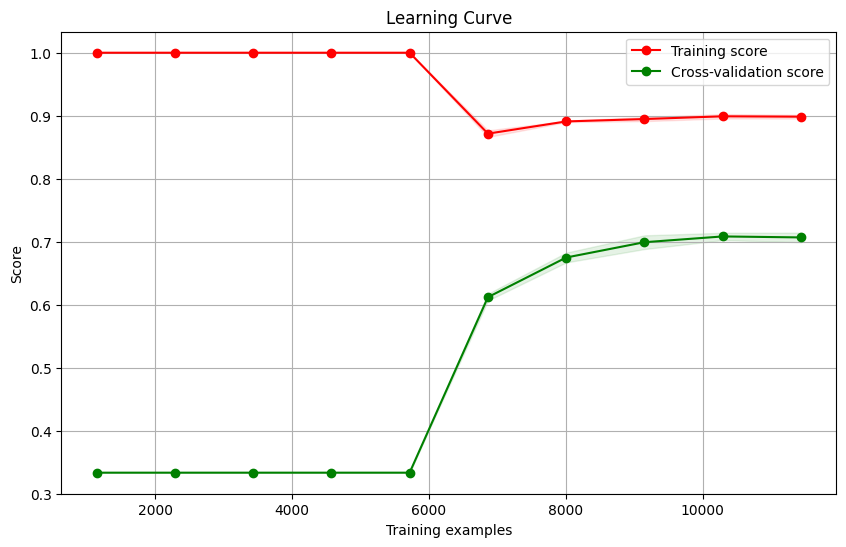

In [ ]:
train_sizes = np.linspace(0.1, 1.0, 10)
scoring = "f1_macro"
plot_learning_curve(best_dt_classifier, X_train_undersampled, y_train_undersampled, scoring, train_sizes)

In [ ]:
## 4/7 stratified undersampling - data import
X_train_undersampled = pd.read_csv('X_train_undersampled_str.csv')

y_train_undersampled = pd.read_csv('y_train_undersampled_str.csv')

y_train_undersampled = np.ravel(y_train_undersampled.values)

In [ ]:
#convert arrays to pandas df
X_train_df = pd.DataFrame(X_train_undersampled)
X_valid_df = pd.DataFrame(X_valid_transformed)

#get the columns/features of each dataset
features_train = set(X_train_df.columns)
features_valid = set(X_valid_df.columns)

#check if the features are the same
if features_train == features_valid:
    print("Number of features is the same in training and validation sets.")
else:
    print("Number of features is different in training and validation sets.")

Number of features is the same in training and validation sets.


In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42)

#parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'] #auto is deprecated
}

random_search = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=5,
    cv=3,
    scoring='f1_macro',
    verbose=2,
    random_state=42
)

random_search.fit(X_train_undersampled, y_train_undersampled)

# Step 4: Print the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters DT stratified undersampling:", best_params)

# Step 5: Train the Decision Tree classifier with the best hyperparameters
best_dt_classifier = DecisionTreeClassifier(**best_params, random_state=42)
best_dt_classifier.fit(X_train_undersampled, y_train_undersampled)

# Step 6: Evaluate the classifier on the test set
y_pred = best_dt_classifier.predict(X_valid_transformed)

#save model to a file
joblib.dump(best_dt_classifier, 'dt_stratified_undersampling.pkl')

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_sp

['dt_stratified_undersampling.pkl']

In [ ]:
best_dt_classifier = joblib.load('dt_stratified_undersampling.pkl')
y_pred = best_dt_classifier.predict(X_valid_transformed)

In [ ]:
f1 = f1_score(y_valid, y_pred, average = "macro")
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.4434


In [ ]:
f1 = f1_score(y_valid, y_pred, average = "weighted")
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.8237


In [ ]:
##confusion matrix & classification report
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred))

print("\nClassification Report:")
print(classification_report(y_valid, y_pred))

Confusion Matrix:
[[112989  45335]
 [   347   1329]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83    158324
           1       0.03      0.79      0.05      1676

    accuracy                           0.71    160000
   macro avg       0.51      0.75      0.44    160000
weighted avg       0.99      0.71      0.82    160000



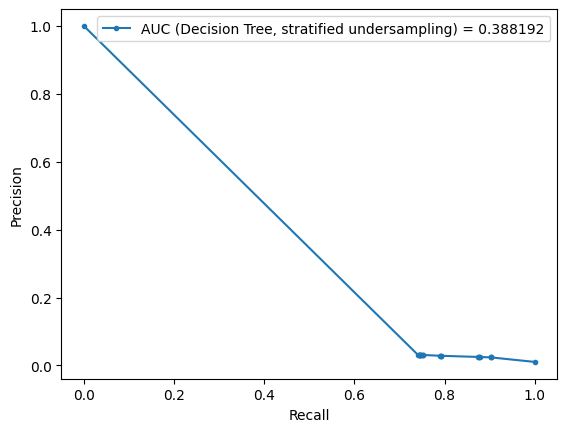

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Assuming y_valid and probabilities are available
#y_valid =  y_valid
probabilities = best_dt_classifier.predict_proba(X_valid_transformed)[:, 1]  # Probabilities of the positive class

# Calculate the "No Skill" precision

# Calculate precision-recall pairs
precision_dt, recall_dt, _ = precision_recall_curve(y_valid, probabilities)
auc_dt = auc(recall_dt, precision_dt)

# Plot the precision-recall curve

plt.plot(recall_dt, precision_dt, marker=".", label=f"AUC (Decision Tree, stratified undersampling) = {auc_dt:.6f}")

# Axis labels
plt.xlabel("Recall")
plt.ylabel("Precision")

# Show the legend
plt.legend()

# Show the plot
plt.show()

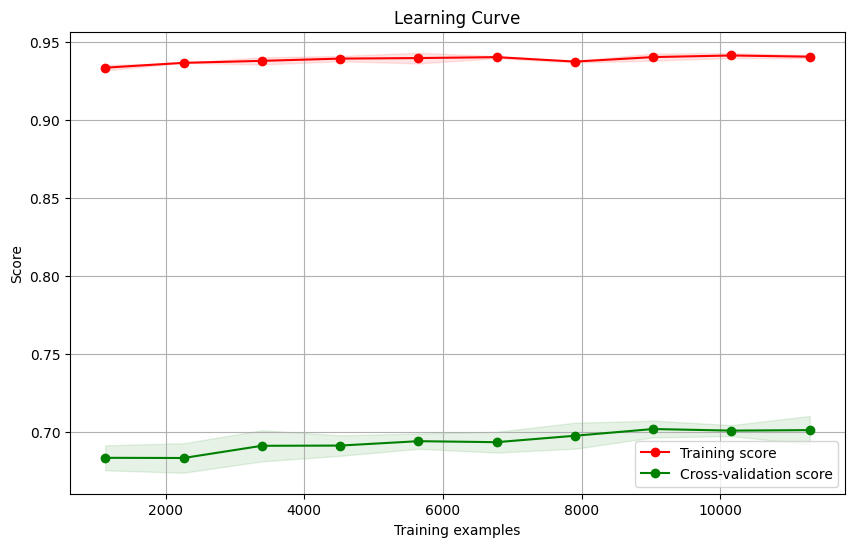

In [ ]:
train_sizes = np.linspace(0.1, 1.0, 10) ##not tuning max depth, stratified undersampling
scoring = "f1_macro"
plot_learning_curve(best_dt_classifier, X_train_undersampled, y_train_undersampled, scoring, train_sizes)

In [ ]:
###stratified undersampling DT is overfitting -> prune the tree, manual adjustments
##train the dt classifier with relaxed hyperparameters
#Best Hyperparameters DT stratified undersampling: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'entropy'}

#the best hyperparameters from the hyperparameter tuning
best_hyperparameters = {'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2', 'criterion': 'entropy'}

##prune the tree further by setting max_depth to a smaller value
pruned_max_depth = 100
pruned_dt_classifier = DecisionTreeClassifier(max_depth=pruned_max_depth, **best_hyperparameters, random_state=42)
pruned_dt_classifier.fit(X_train_undersampled, y_train_undersampled)

# Evaluate the pruned classifier on the validation
y_pred_pruned = pruned_dt_classifier.predict(X_valid_transformed)


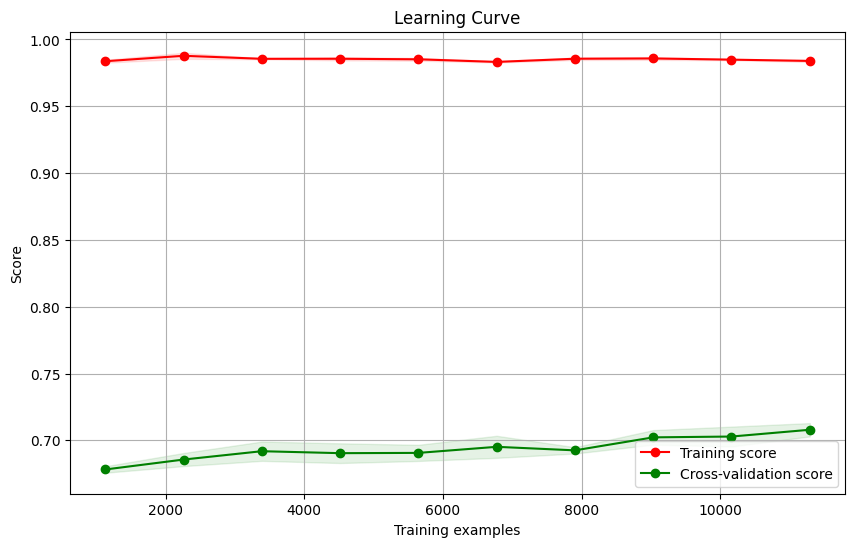

In [ ]:
train_sizes = np.linspace(0.1, 1.0, 10)
scoring = "f1_macro"
plot_learning_curve(pruned_dt_classifier, X_train_undersampled, y_train_undersampled, scoring, train_sizes)

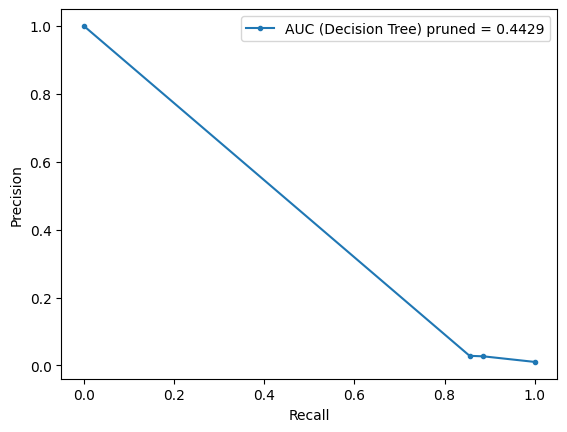

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Assuming y_valid and probabilities are available
y_valid =  y_valid
probabilities = pruned_dt_classifier.predict_proba(X_valid_transformed)[:, 1]  # Probabilities of the positive class

# Calculate the "No Skill" precision

# Calculate precision-recall pairs
precision_dt, recall_dt, _ = precision_recall_curve(y_valid, probabilities)
auc_dt = auc(recall_dt, precision_dt)

# Plot the precision-recall curve

plt.plot(recall_dt, precision_dt, marker=".", label=f"AUC (Decision Tree) pruned = {auc_dt:.4f}")

# Axis labels
plt.xlabel("Recall")
plt.ylabel("Precision")

# Show the legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
f1 = f1_score(y_valid, y_pred_pruned, average = "macro")
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.4354


In [ ]:
f1 = f1_score(y_valid, y_pred_pruned, average = "weighted")
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.8078


In [ ]:
##confusion matrix & classification report
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred_pruned))

print("\nClassification Report:")
print(classification_report(y_valid, y_pred_pruned))

Confusion Matrix:
[[109239  49085]
 [   242   1434]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.69      0.82    158324
           1       0.03      0.86      0.05      1676

    accuracy                           0.69    160000
   macro avg       0.51      0.77      0.44    160000
weighted avg       0.99      0.69      0.81    160000



In [ ]:
class_report = classification_report(y_valid, y_pred_pruned)

# Print F1 scores per class
for line in class_report.split('\n')[2:-1]:
    row = line.split()
    if len(row) > 1:
        class_label = row[0]
        f1 = float(row[-2])
        print(f"Class {class_label}: F1 Score = {f1:.2f}")

Class 0: F1 Score = 0.82
Class 1: F1 Score = 0.05
Class accuracy: F1 Score = 0.69
Class macro: F1 Score = 0.44
Class weighted: F1 Score = 0.81


In [ ]:
##custom scorer

#obtain predicted probabilities for the positive class from the model
y_prob = pruned_dt_classifier.predict_proba(X_valid_transformed)[:, 1]

#make a list of touples with predicted probabilities and true labels in descending order
sorted_probs = sorted(zip(y_prob, y_valid), key=lambda x: x[0], reverse=True)

#calculate cumulative sum of true positives
cumulative_tp = [0] + list(np.cumsum([y == 1 for _, y in sorted_probs]))

#find the threshold where cumulative TP is closest to 90%
target_cumulative_tp = int(0.9 * cumulative_tp[-1])
threshold = next(prob for prob, _ in sorted_probs if cumulative_tp[np.searchsorted(cumulative_tp, target_cumulative_tp)] >= target_cumulative_tp) #find the threshold value where the cumulative TP is the closest to the target cumulative TP

#applu the threshold to classify positive and negative instances
y_pred_pruned = (y_prob >= threshold).astype(int) #astype to convert booleans to 0 and 1

#evaluate the model using the chosen threshold
conf_matrix = confusion_matrix(y_valid, y_pred_pruned)
fpr = conf_matrix[0, 1] / (conf_matrix[0, 1] + conf_matrix[0, 0])
recall = recall_score(y_valid, y_pred)

print(f"Chosen threshold: {threshold}")
print(f"False Positive Rate: {fpr}")
print(f"Recall: {recall}")
print(conf_matrix)



Chosen threshold: 1.0
False Positive Rate: 0.3100288016977843
Recall: 0.10441527446300716
[[109239  49085]
 [   242   1434]]


In [ ]:
###### class weights + stratified undersampling

In [ ]:
##stratified undersampling with class weight
#calc the weight for the positive class (#1)
#inv of the proportion of positive cases in the dataset
weight_positive = 1 / 0.011  # 1/0.011 = 90.91
 #set the class weights
class_weights = {0: 1, 1: weight_positive}
dt_classifier = DecisionTreeClassifier(class_weight=class_weights, random_state=42)

# Step 2: Define the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

random_search = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=5,
    cv=3,
    scoring='f1_macro',
    verbose=2,
    random_state=42
)

random_search.fit(X_train_undersampled, y_train_undersampled)

# Step 4: Print the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters DT stratified undersampling w/class weights:", best_params)


# Step 5: Train the Decision Tree classifier with the best hyperparameters
best_dt_classifier = DecisionTreeClassifier(**best_params, random_state=42)
best_dt_classifier.fit(X_train_undersampled, y_train_undersampled)

# Step 6: Evaluate the classifier on the test set
y_pred = best_dt_classifier.predict(X_valid_transformed)

#save model to a file
joblib.dump(best_dt_classifier, 'dt_stratified_undersampling_classweights.pkl')


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_spl

['dt_stratified_undersampling_classweights1.pkl']

In [ ]:
f1 = f1_score(y_valid, y_pred, average = "macro")
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.4621


In [ ]:
f1 = f1_score(y_valid, y_pred, average = "weighted")
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.8543


In [ ]:
##confusion matrix & classification report
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred))

print("\nClassification Report:")
print(classification_report(y_valid, y_pred))

Confusion Matrix:
[[120414  37910]
 [   419   1257]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.76      0.86    158324
           1       0.03      0.75      0.06      1676

    accuracy                           0.76    160000
   macro avg       0.51      0.76      0.46    160000
weighted avg       0.99      0.76      0.85    160000



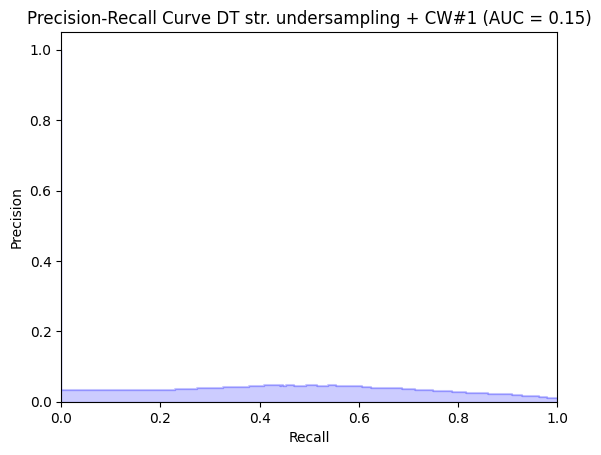

Area Under the Curve DT str. undersampling + CW#1  (AUC): 0.1457


In [ ]:
precision, recall, _ = precision_recall_curve(y_valid, best_dt_classifier.predict_proba(X_valid_transformed)[:, 1])
auc_score = auc(recall, precision)

# Plot the precision-recall curve
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall Curve DT str. undersampling + CW#1 (AUC = {auc_score:.2f})')
plt.show()

print(f"Area Under the Curve DT str. undersampling + CW#1  (AUC): {auc_score:.4f}")

In [ ]:
average_precision = average_precision_score(y_valid, y_pred)
print(f'Area Under the Precision-Recall Curve (AUC-PR): {average_precision:.4f}')

Area Under the Precision-Recall Curve (AUC-PR): 0.0267


In [ ]:
class_report = classification_report(y_valid, y_pred)

# Print F1 scores per class
for line in class_report.split('\n')[2:-1]:
    row = line.split()
    if len(row) > 1:
        class_label = row[0]
        f1 = float(row[-2])
        print(f"Class {class_label}: F1 Score = {f1:.2f}")

Class 0: F1 Score = 0.86
Class 1: F1 Score = 0.06
Class accuracy: F1 Score = 0.76
Class macro: F1 Score = 0.46
Class weighted: F1 Score = 0.85


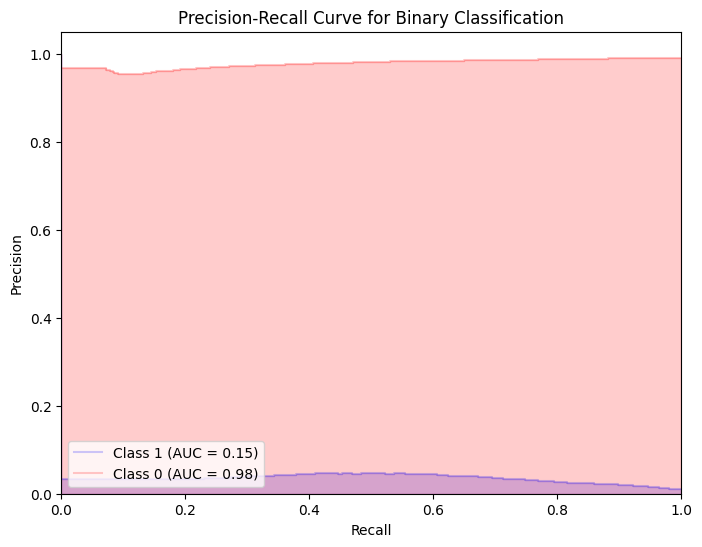

AUC Class 1: 0.1457
AUC Class 0: 0.9788


In [ ]:
# Calculate precision-recall curve for class 1
precision_class1, recall_class1, _ = precision_recall_curve(y_valid, best_dt_classifier.predict_proba(X_valid_transformed)[:, 1])
auc_score_class1 = auc(recall_class1, precision_class1)

# Calculate precision-recall curve for class 0
precision_class0, recall_class0, _ = precision_recall_curve(1 - y_valid, 1 - best_dt_classifier.predict_proba(X_valid_transformed)[:, 0])  # Invert labels for class 0
auc_score_class0 = auc(recall_class0, precision_class0)

# Plot the precision-recall curves
plt.figure(figsize=(8, 6))

# Plot precision-recall curve for class 1
plt.step(recall_class1, precision_class1, color='b', alpha=0.2, where='post', label=f'Class 1 (AUC = {auc_score_class1:.2f})')
plt.fill_between(recall_class1, precision_class1, step='post', alpha=0.2, color='b')

# Plot precision-recall curve for class 0
plt.step(recall_class0, precision_class0, color='r', alpha=0.2, where='post', label=f'Class 0 (AUC = {auc_score_class0:.2f})')
plt.fill_between(recall_class0, precision_class0, step='post', alpha=0.2, color='r')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve for Binary Classification')
plt.legend(loc='lower left')
plt.show()

print(f"AUC Class 1: {auc_score_class1:.4f}")
print(f"AUC Class 0: {auc_score_class0:.4f}")

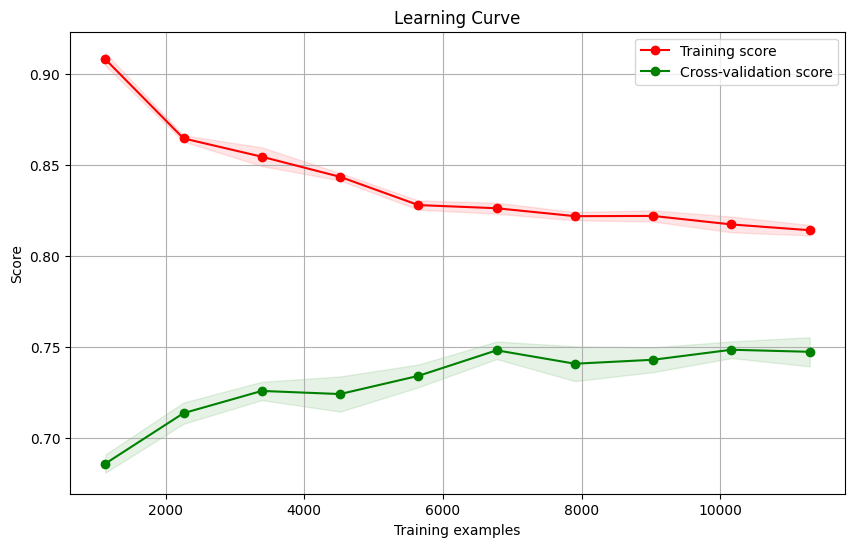

In [ ]:
train_sizes = np.linspace(0.1, 1.0, 10)
scoring = "f1_macro"
plot_learning_curve(best_dt_classifier, X_train_undersampled, y_train_undersampled, scoring, train_sizes)


In [ ]:
##custom scorer

#obtain predicted probabilities for the positive class from the model
y_prob = best_dt_classifier.predict_proba(X_valid_transformed)[:, 1]

#make a list of touples with predicted probabilities and true labels in descending order
sorted_probs = sorted(zip(y_prob, y_valid), key=lambda x: x[0], reverse=True)

#calculate cumulative sum of true positives
cumulative_tp = [0] + list(np.cumsum([y == 1 for _, y in sorted_probs]))

#find the threshold where cumulative TP is closest to 90%
target_cumulative_tp = int(0.9 * cumulative_tp[-1])
threshold = next(prob for prob, _ in sorted_probs if cumulative_tp[np.searchsorted(cumulative_tp, target_cumulative_tp)] >= target_cumulative_tp) #find the threshold value where the cumulative TP is the closest to the target cumulative TP

#applu the threshold to classify positive and negative instances
y_pred = (y_prob >= threshold).astype(int) #astype to convert booleans to 0 and 1

#evaluate the model using the chosen threshold
conf_matrix = confusion_matrix(y_valid, y_pred)
fpr = conf_matrix[0, 1] / (conf_matrix[0, 1] + conf_matrix[0, 0])
recall = recall_score(y_valid, y_pred)

print(f"Chosen threshold: {threshold}")
print(f"False Positive Rate: {fpr}")
print(f"Recall: {recall}")
print(conf_matrix)



Chosen threshold: 1.0
False Positive Rate: 0.07275586771430737
Recall: 0.22971360381861575
[[146805  11519]
 [  1291    385]]


In [ ]:
##stratified undersampling with class weight
#calc the weight for the positive class (#2)
#inv of the proportion of positive cases in the dataset
#weight_positive = 1 / 0.011  # 1/0.011 = 90.91
 #set the class weights
class_weights = {0: 1, 1: 2}
dt_classifier = DecisionTreeClassifier(class_weight=class_weights, random_state=42)

# Step 2: Define the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

random_search = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=5,
    cv=3,
    scoring='f1_macro',
    verbose=2,
    random_state=42
)

random_search.fit(X_train_undersampled, y_train_undersampled)

# Step 4: Print the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters DT stratified undersampling w/class weights:", best_params)


# Step 5: Train the Decision Tree classifier with the best hyperparameters
best_dt_classifier = DecisionTreeClassifier(**best_params, random_state=42)
best_dt_classifier.fit(X_train_undersampled, y_train_undersampled)

# Step 6: Evaluate the classifier on the test set
y_pred = best_dt_classifier.predict(X_valid_transformed)

#save model to a file
joblib.dump(best_dt_classifier, 'dt_stratified_undersampling_classweights2.pkl')


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_spl

['dt_stratified_undersampling_classweights2.pkl']

In [ ]:
f1 = f1_score(y_valid, y_pred, average = "macro")
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.4621


In [ ]:
f1 = f1_score(y_valid, y_pred, average = "weighted")
print(f"F1 Score: {f1:.4f}")


F1 Score: 0.8543


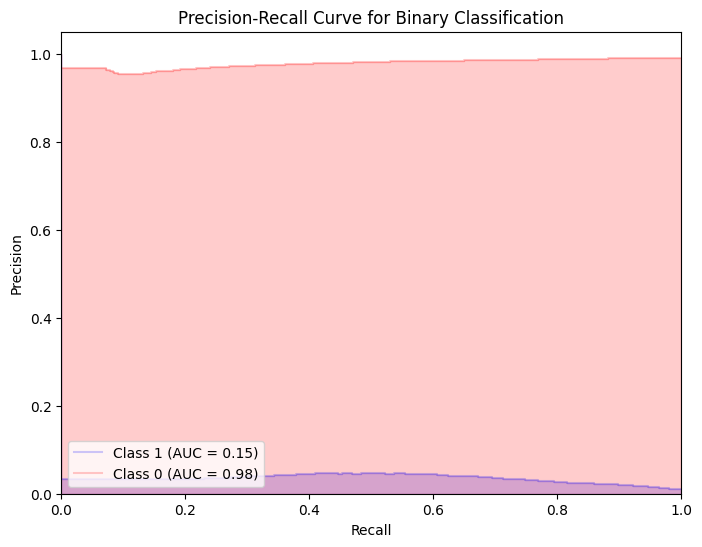

AUC Class 1: 0.1457
AUC Class 0: 0.9788


In [ ]:
# Calculate precision-recall curve for class 1
precision_class1, recall_class1, _ = precision_recall_curve(y_valid, best_dt_classifier.predict_proba(X_valid_transformed)[:, 1])
auc_score_class1 = auc(recall_class1, precision_class1)

# Calculate precision-recall curve for class 0
precision_class0, recall_class0, _ = precision_recall_curve(1 - y_valid, 1 - best_dt_classifier.predict_proba(X_valid_transformed)[:, 0])  # Invert labels for class 0
auc_score_class0 = auc(recall_class0, precision_class0)

# Plot the precision-recall curves
plt.figure(figsize=(8, 6))

# Plot precision-recall curve for class 1
plt.step(recall_class1, precision_class1, color='b', alpha=0.2, where='post', label=f'Class 1 (AUC = {auc_score_class1:.2f})')
plt.fill_between(recall_class1, precision_class1, step='post', alpha=0.2, color='b')

# Plot precision-recall curve for class 0
plt.step(recall_class0, precision_class0, color='r', alpha=0.2, where='post', label=f'Class 0 (AUC = {auc_score_class0:.2f})')
plt.fill_between(recall_class0, precision_class0, step='post', alpha=0.2, color='r')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve for Binary Classification')
plt.legend(loc='lower left')
plt.show()

print(f"AUC Class 1: {auc_score_class1:.4f}")
print(f"AUC Class 0: {auc_score_class0:.4f}")

In [ ]:
##class weights no sampling


X_train_resampled = pd.read_csv('X_train_transformed_basicfull.csv')

y_train_resampled = pd.read_csv('y_train_basicfull.csv')

y_train_resampled = np.ravel(y_train_resampled.values)


In [ ]:
#convert arrays to pandas df
X_train_df = pd.DataFrame(X_train_resampled)
X_valid_df = pd.DataFrame(X_valid_transformed)

#get the columns/features of each dataset
features_train = set(X_train_df.columns)
features_valid = set(X_valid_df.columns)

#check if the features are the same
if features_train == features_valid:
    print("Number of features is the same in training and validation sets.")
else:
    print("Number of features is different in training and validation sets.")

Number of features is the same in training and validation sets.


In [ ]:
##no sampling with class weight
#calc the weight for the positive class (#1)
#inv of the proportion of positive cases in the dataset
weight_positive = 1 / 0.011  # 1/0.011 = 90.91
 #set the class weights
class_weights = {0: 1, 1: weight_positive}
dt_classifier = DecisionTreeClassifier(class_weight=class_weights, random_state=42)

# Step 2: Define the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

random_search.fit(X_train_resampled, y_train_resampled)

# Step 4: Print the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters DT  w/class weights:", best_params)


# Step 5: Train the Decision Tree classifier with the best hyperparameters
best_dt_classifier = DecisionTreeClassifier(**best_params, random_state=42)
best_dt_classifier.fit(X_train_resampled, y_train_resampled)

# Step 6: Evaluate the classifier on the test set
y_pred = best_dt_classifier.predict(X_valid_transformed)

#save model to a file
joblib.dump(best_dt_classifier, 'dt_basicn_classweights1.pkl')


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   4.1s
[CV] END criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   4.5s
[CV] END criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   4.4s
[CV] END criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   2.8s
[CV] END criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   2.8s
[CV] END criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   3.1s
[CV] END criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   4.0s
[CV] END criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   4.7s
[CV] END criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_sp

['dt_basicn_classweights1.pkl']

In [ ]:
best_dt_classifier = joblib.load('dt_basicn_classweights1.pkl')
y_pred = best_dt_classifier.predict(X_valid_transformed)

In [ ]:
f1 = f1_score(y_valid, y_pred, average = "macro")
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.5406


In [ ]:
f1 = f1_score(y_valid, y_pred, average = "weighted")
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.9820


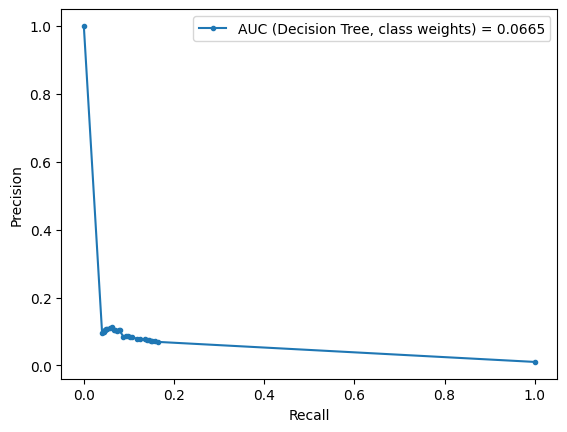

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Assuming y_valid and probabilities are available
y_valid =  y_valid
probabilities = best_dt_classifier.predict_proba(X_valid_transformed)[:, 1]  # Probabilities of the positive class

# Calculate the "No Skill" precision

# Calculate precision-recall pairs
precision_dt, recall_dt, _ = precision_recall_curve(y_valid, probabilities)
auc_dt = auc(recall_dt, precision_dt)

# Plot the precision-recall curve

plt.plot(recall_dt, precision_dt, marker=".", label=f"AUC (Decision Tree, class weights) = {auc_dt:.4f}")

# Axis labels
plt.xlabel("Recall")
plt.ylabel("Precision")

# Show the legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
class_report = classification_report(y_valid, y_pred)

# Print F1 scores per class
for line in class_report.split('\n')[2:-1]:
    row = line.split()
    if len(row) > 1:
        class_label = row[0]
        f1 = float(row[-2])
        print(f"Class {class_label}: F1 Score = {f1:.2f}")

Class 0: F1 Score = 0.99
Class 1: F1 Score = 0.09
Class accuracy: F1 Score = 0.98
Class macro: F1 Score = 0.54
Class weighted: F1 Score = 0.98


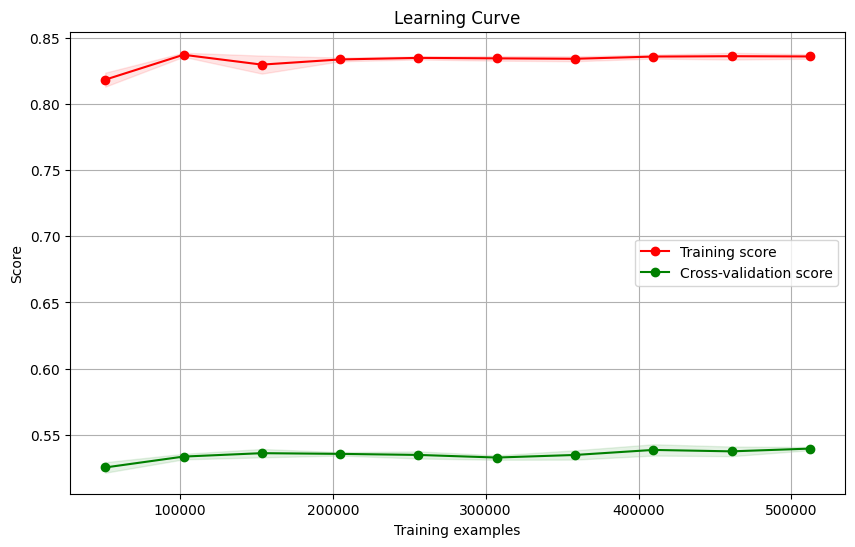

In [ ]:
train_sizes = np.linspace(0.1, 1.0, 10)
scoring = "f1_macro"
plot_learning_curve(best_dt_classifier, X_train_resampled, y_train_resampled, scoring, train_sizes)


In [ ]:
##custom scorer

#obtain predicted probabilities for the positive class from the model
y_prob = best_dt_classifier.predict_proba(X_valid_transformed)[:, 1]

#make a list of touples with predicted probabilities and true labels in descending order
sorted_probs = sorted(zip(y_prob, y_valid), key=lambda x: x[0], reverse=True)

#calculate cumulative sum of true positives
cumulative_tp = [0] + list(np.cumsum([y == 1 for _, y in sorted_probs]))

#find the threshold where cumulative TP is closest to 90%
target_cumulative_tp = int(0.9 * cumulative_tp[-1])
threshold = next(prob for prob, _ in sorted_probs if cumulative_tp[np.searchsorted(cumulative_tp, target_cumulative_tp)] >= target_cumulative_tp) #find the threshold value where the cumulative TP is the closest to the target cumulative TP
x
#applu the threshold to classify positive and negative instances
y_pred = (y_prob >= threshold).astype(int) #astype to convert booleans to 0 and 1

#evaluate the model using the chosen threshold
conf_matrix = confusion_matrix(y_valid, y_pred)
fpr = conf_matrix[0, 1] / (conf_matrix[0, 1] + conf_matrix[0, 0])
recall = recall_score(y_valid, y_pred)

print(f"Chosen threshold: {threshold}")
print(f"False Positive Rate: {fpr}")
print(f"Recall: {recall}")
print(conf_matrix)



Chosen threshold: 1.0
False Positive Rate: 0.004092872843030747
Recall: 0.0405727923627685
[[157676    648]
 [  1608     68]]


In [ ]:
##confusion matrix & classification report
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred))

print("\nClassification Report:")
print(classification_report(y_valid, y_pred))

Confusion Matrix:
[[157676    648]
 [  1608     68]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    158324
           1       0.09      0.04      0.06      1676

    accuracy                           0.99    160000
   macro avg       0.54      0.52      0.52    160000
weighted avg       0.98      0.99      0.98    160000



In [ ]:
#####ADASYN - only transactional data

X_train_resampled = pd.read_csv('X_train_transformed_adasyn_trans.csv')
X_valid_transformed = pd.read_csv('X_valid_transformed_basic_trans.csv')
X_test_transformed = pd.read_csv('X_test_transformed_basic_trans.csv')

y_train_resampled = pd.read_csv('y_train_adasyn_trans.csv')
y_valid = pd.read_csv('y_valid_basic_trans.csv')
y_test = pd.read_csv('y_test_basic_trans.csv')
y_train_resampled = np.ravel(y_train_resampled.values)
y_valid = np.ravel(y_valid.values)
y_test = np.ravel(y_test.values)

In [ ]:
#convert arrays to pandas df
X_train_df = pd.DataFrame(X_train_resampled)
X_valid_df = pd.DataFrame(X_valid_transformed)

#get the columns/features of each dataset
features_train = set(X_train_df.columns)
features_valid = set(X_valid_df.columns)

#check if the features are the same
if features_train == features_valid:
    print("Number of features is the same in training and validation sets.")
else:
    print("Number of features is different in training and validation sets.")

Number of features is the same in training and validation sets.


In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42)

#parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'] #auto is deprecated
}

random_search = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=5,
    cv=3,
    scoring='f1_macro',
    verbose=2,
    random_state=42
)

random_search.fit(X_train_resampled, y_train_resampled)

# Step 4: Print the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters DT ADASYN transactional data:", best_params)

# Step 5: Train the Decision Tree classifier with the best hyperparameters
best_dt_classifier = DecisionTreeClassifier(**best_params, random_state=42)
best_dt_classifier.fit(X_train_resampled, y_train_resampled)

# Step 6: Evaluate the classifier on the test set
y_pred = best_dt_classifier.predict(X_valid_transformed)

#save model to a file
joblib.dump(best_dt_classifier, 'dt_adasyn_trans.pkl')

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=3; total time=   3.8s
[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=3; total time=   3.4s
[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=3; total time=   3.7s
[CV] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=3; total time=   5.4s
[CV] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=3; total time=   5.8s
[CV] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=3; total time=   5.9s
[CV] END criterion=entropy, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   5.4s
[CV] END criterion=entropy, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_spl

['dt_adasyn_trans.pkl']

In [ ]:
f1 = f1_score(y_valid, y_pred, average = "macro")
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.5292


In [ ]:
f1 = f1_score(y_valid, y_pred, average = "weighted")
print(f"F1 Score: {f1:.4f}")


F1 Score: 0.9777


In [ ]:
##confusion matrix & classification report
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred))

print("\nClassification Report:")
print(classification_report(y_valid, y_pred))

Confusion Matrix:
[[155823   2501]
 [  1522    154]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    158324
           1       0.06      0.09      0.07      1676

    accuracy                           0.97    160000
   macro avg       0.52      0.54      0.53    160000
weighted avg       0.98      0.97      0.98    160000



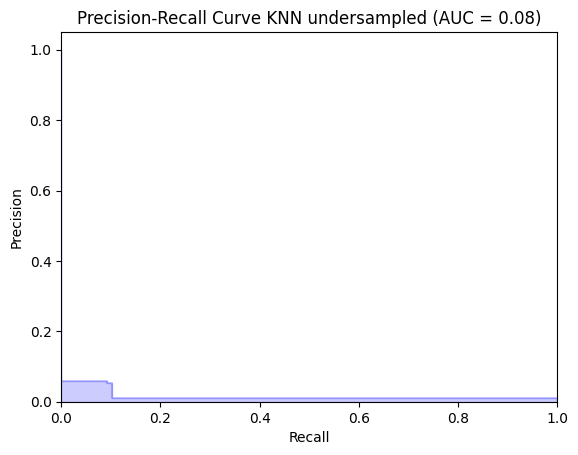

Area Under the Curve KNN undersampled (AUC): 0.0778


In [ ]:
precision, recall, _ = precision_recall_curve(y_valid, best_dt_classifier.predict_proba(X_valid_transformed)[:, 1])
auc_score = auc(recall, precision)

# Plot the precision-recall curve
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall Curve KNN undersampled (AUC = {auc_score:.2f})')
plt.show()

print(f"Area Under the Curve KNN undersampled (AUC): {auc_score:.4f}")

In [ ]:
average_precision = average_precision_score(y_valid, y_pred)
print(f'Area Under the Precision-Recall Curve (AUC-PR): {average_precision:.4f}')


Area Under the Precision-Recall Curve (AUC-PR): 0.0148


In [ ]:
class_report = classification_report(y_valid, y_pred)

# Print F1 scores per class
for line in class_report.split('\n')[2:-1]:
    row = line.split()
    if len(row) > 1:
        class_label = row[0]
        f1 = float(row[-2])
        print(f"Class {class_label}: F1 Score = {f1:.2f}")

Class 0: F1 Score = 0.99
Class 1: F1 Score = 0.07
Class accuracy: F1 Score = 0.97
Class macro: F1 Score = 0.53
Class weighted: F1 Score = 0.98


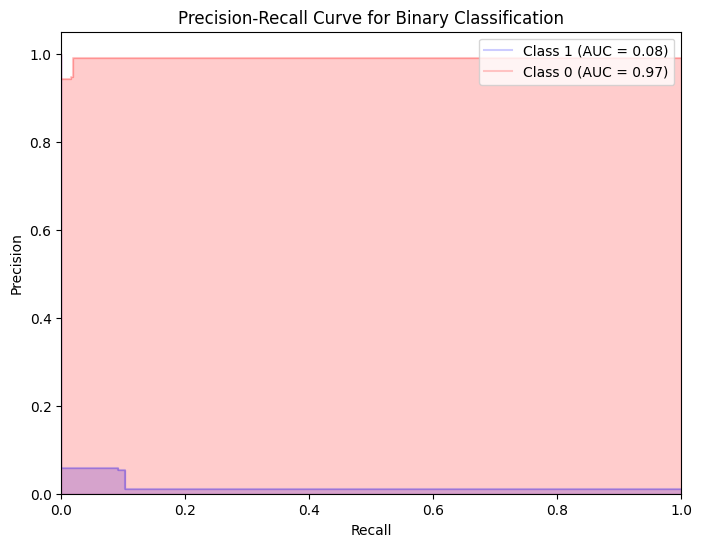

AUC Class 1: 0.0778
AUC Class 0: 0.9681


In [ ]:
# Calculate precision-recall curve for class 1
precision_class1, recall_class1, _ = precision_recall_curve(y_valid, best_dt_classifier.predict_proba(X_valid_transformed)[:, 1])
auc_score_class1 = auc(recall_class1, precision_class1)

# Calculate precision-recall curve for class 0
precision_class0, recall_class0, _ = precision_recall_curve(1 - y_valid, 1 - best_dt_classifier.predict_proba(X_valid_transformed)[:, 0])  # Invert labels for class 0
auc_score_class0 = auc(recall_class0, precision_class0)

# Plot the precision-recall curves
plt.figure(figsize=(8, 6))

# Plot precision-recall curve for class 1
plt.step(recall_class1, precision_class1, color='b', alpha=0.2, where='post', label=f'Class 1 (AUC = {auc_score_class1:.2f})')
plt.fill_between(recall_class1, precision_class1, step='post', alpha=0.2, color='b')

# Plot precision-recall curve for class 0
plt.step(recall_class0, precision_class0, color='r', alpha=0.2, where='post', label=f'Class 0 (AUC = {auc_score_class0:.2f})')
plt.fill_between(recall_class0, precision_class0, step='post', alpha=0.2, color='r')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve for Binary Classification')
plt.legend(loc='upper right')
plt.show()

print(f"AUC Class 1: {auc_score_class1:.4f}")
print(f"AUC Class 0: {auc_score_class0:.4f}")

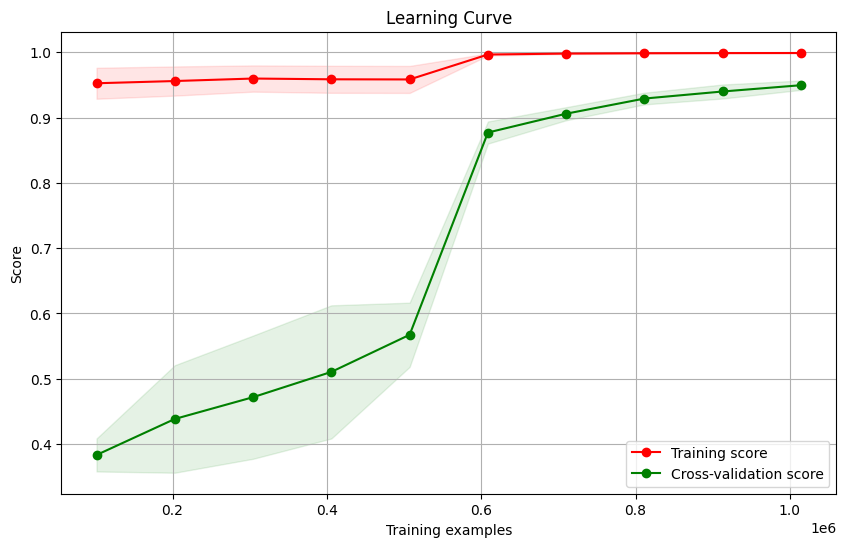

In [ ]:
train_sizes = np.linspace(0.1, 1.0, 10)
scoring = "f1_macro"
plot_learning_curve(best_dt_classifier, X_train_resampled, y_train_resampled, scoring, train_sizes)

In [ ]:
##custom scorer

#obtain predicted probabilities for the positive class from the model
y_prob = best_dt_classifier.predict_proba(X_valid_transformed)[:, 1]

#make a list of touples with predicted probabilities and true labels in descending order
sorted_probs = sorted(zip(y_prob, y_valid), key=lambda x: x[0], reverse=True)

#calculate cumulative sum of true positives
cumulative_tp = [0] + list(np.cumsum([y == 1 for _, y in sorted_probs]))

#find the threshold where cumulative TP is closest to 90%
target_cumulative_tp = int(0.9 * cumulative_tp[-1])
threshold = next(prob for prob, _ in sorted_probs if cumulative_tp[np.searchsorted(cumulative_tp, target_cumulative_tp)] >= target_cumulative_tp) #find the threshold value where the cumulative TP is the closest to the target cumulative TP

#applu the threshold to classify positive and negative instances
y_pred = (y_prob >= threshold).astype(int) #astype to convert booleans to 0 and 1

#evaluate the model using the chosen threshold
conf_matrix = confusion_matrix(y_valid, y_pred)
fpr = conf_matrix[0, 1] / (conf_matrix[0, 1] + conf_matrix[0, 0])
recall = recall_score(y_valid, y_pred)

print(f"Chosen threshold: {threshold}")
print(f"False Positive Rate: {fpr}")
print(f"Recall: {recall}")
print(conf_matrix)



Chosen threshold: 1.0
False Positive Rate: 0.01579672064879614
Recall: 0.09188544152744631
[[155823   2501]
 [  1522    154]]


In [ ]:
##Adasyn transactional + class weights

In [ ]:

#calc the weight for the positive class (#1)
#inv of the proportion of positive cases in the dataset
weight_positive = 1 / 0.011  # 1/0.011 = 90.91
 #set the class weights
class_weights = {0: 1, 1: weight_positive}
dt_classifier = DecisionTreeClassifier(class_weight=class_weights, random_state=42)

# Step 2: Define the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 30, 50, 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

random_search = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=5,
    cv=3,
    scoring='f1_macro',
    verbose=2,
    random_state=42
)

random_search.fit(X_train_resampled, y_train_resampled)

# Step 4: Print the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters DT ADASYN transactional w/class weights:", best_params)


# Step 5: Train the Decision Tree classifier with the best hyperparameters
best_dt_classifier = DecisionTreeClassifier(**best_params, random_state=42)
best_dt_classifier.fit(X_train_resampled, y_train_resampled)

# Step 6: Evaluate the classifier on the test set
y_pred = best_dt_classifier.predict(X_valid_transformed)

#save model to a file
joblib.dump(best_dt_classifier, 'dt_adasyn_trans_classweights1.pkl')


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END criterion=entropy, max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=2; total time=   5.8s
[CV] END criterion=entropy, max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=2; total time=   5.6s
[CV] END criterion=entropy, max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=2; total time=   5.6s
[CV] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   6.8s
[CV] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   6.6s
[CV] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   7.5s
[CV] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5; total time=   5.5s
[CV] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split

['dt_adasyn_trans_classweights1.pkl']

In [ ]:
f1 = f1_score(y_valid, y_pred, average = "macro")
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.5386


In [ ]:
f1 = f1_score(y_valid, y_pred, average = "weighted")
print(f"F1 Score: {f1:.4f}")


F1 Score: 0.9755


In [ ]:
##confusion matrix & classification report
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred))

print("\nClassification Report:")
print(classification_report(y_valid, y_pred))

Confusion Matrix:
[[154979   3345]
 [  1433    243]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98    158324
           1       0.07      0.14      0.09      1676

    accuracy                           0.97    160000
   macro avg       0.53      0.56      0.54    160000
weighted avg       0.98      0.97      0.98    160000



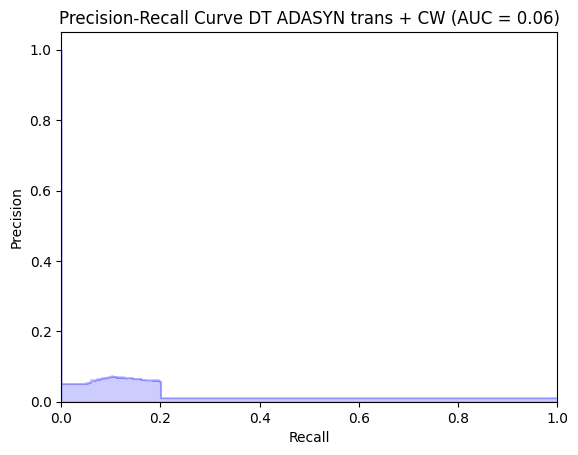

Area Under the Curve DT ADASYN trans + CW (AUC): 0.0625


In [ ]:
precision, recall, _ = precision_recall_curve(y_valid, best_dt_classifier.predict_proba(X_valid_transformed)[:, 1])
auc_score = auc(recall, precision)

# Plot the precision-recall curve
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall Curve DT ADASYN trans + CW (AUC = {auc_score:.2f})')
plt.show()

print(f"Area Under the Curve DT ADASYN trans + CW (AUC): {auc_score:.4f}")

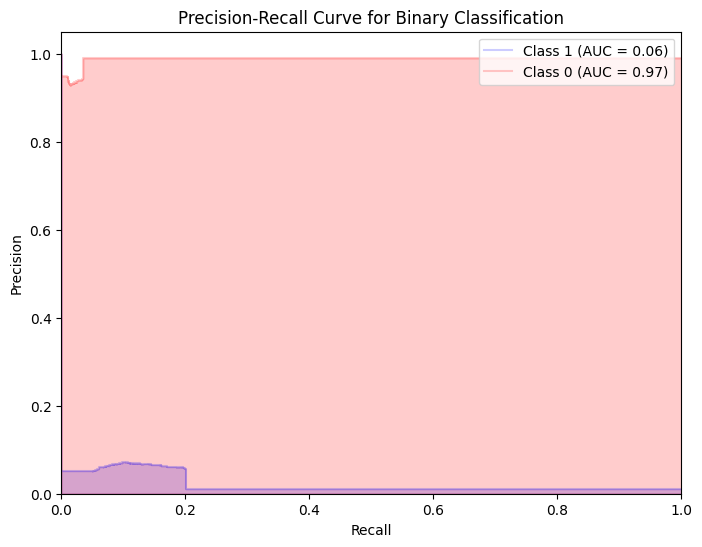

AUC Class 1: 0.0625
AUC Class 0: 0.9658


In [ ]:
# Calculate precision-recall curve for class 1
precision_class1, recall_class1, _ = precision_recall_curve(y_valid, best_dt_classifier.predict_proba(X_valid_transformed)[:, 1])
auc_score_class1 = auc(recall_class1, precision_class1)

# Calculate precision-recall curve for class 0
precision_class0, recall_class0, _ = precision_recall_curve(1 - y_valid, 1 - best_dt_classifier.predict_proba(X_valid_transformed)[:, 0])  # Invert labels for class 0
auc_score_class0 = auc(recall_class0, precision_class0)

# Plot the precision-recall curves
plt.figure(figsize=(8, 6))

# Plot precision-recall curve for class 1
plt.step(recall_class1, precision_class1, color='b', alpha=0.2, where='post', label=f'Class 1 (AUC = {auc_score_class1:.2f})')
plt.fill_between(recall_class1, precision_class1, step='post', alpha=0.2, color='b')

# Plot precision-recall curve for class 0
plt.step(recall_class0, precision_class0, color='r', alpha=0.2, where='post', label=f'Class 0 (AUC = {auc_score_class0:.2f})')
plt.fill_between(recall_class0, precision_class0, step='post', alpha=0.2, color='r')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve for Binary Classification')
plt.legend(loc='upper right')
plt.show()

print(f"AUC Class 1: {auc_score_class1:.4f}")
print(f"AUC Class 0: {auc_score_class0:.4f}")

In [ ]:
average_precision = average_precision_score(y_valid, y_pred)
print(f'Area Under the Precision-Recall Curve (AUC-PR): {average_precision:.4f}')

Area Under the Precision-Recall Curve (AUC-PR): 0.0188


In [ ]:
class_report = classification_report(y_valid, y_pred)

# Print F1 scores per class
for line in class_report.split('\n')[2:-1]:
    row = line.split()
    if len(row) > 1:
        class_label = row[0]
        f1 = float(row[-2])
        print(f"Class {class_label}: F1 Score = {f1:.2f}")

Class 0: F1 Score = 0.98
Class 1: F1 Score = 0.09
Class accuracy: F1 Score = 0.97
Class macro: F1 Score = 0.54
Class weighted: F1 Score = 0.98


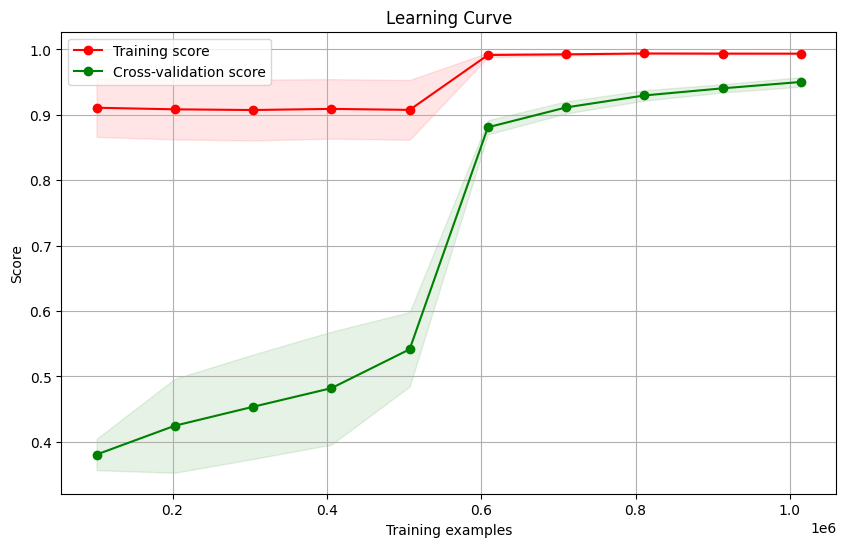

In [ ]:
train_sizes = np.linspace(0.1, 1.0, 10)
scoring = "f1_macro"
plot_learning_curve(best_dt_classifier, X_train_resampled, y_train_resampled, scoring, train_sizes)


In [ ]:
##custom scorer

#obtain predicted probabilities for the positive class from the model
y_prob = best_dt_classifier.predict_proba(X_valid_transformed)[:, 1]

#make a list of touples with predicted probabilities and true labels in descending order
sorted_probs = sorted(zip(y_prob, y_valid), key=lambda x: x[0], reverse=True)

#calculate cumulative sum of true positives
cumulative_tp = [0] + list(np.cumsum([y == 1 for _, y in sorted_probs]))

#find the threshold where cumulative TP is closest to 90%
target_cumulative_tp = int(0.9 * cumulative_tp[-1])
threshold = next(prob for prob, _ in sorted_probs if cumulative_tp[np.searchsorted(cumulative_tp, target_cumulative_tp)] >= target_cumulative_tp) #find the threshold value where the cumulative TP is the closest to the target cumulative TP

#applu the threshold to classify positive and negative instances
y_pred = (y_prob >= threshold).astype(int) #astype to convert booleans to 0 and 1

#evaluate the model using the chosen threshold
conf_matrix = confusion_matrix(y_valid, y_pred)
fpr = conf_matrix[0, 1] / (conf_matrix[0, 1] + conf_matrix[0, 0])
recall = recall_score(y_valid, y_pred)

print(f"Chosen threshold: {threshold}")
print(f"False Positive Rate: {fpr}")
print(f"Recall: {recall}")
print(conf_matrix)



Chosen threshold: 1.0
False Positive Rate: 0.009638462898865618
Recall: 0.049522673031026254
[[156798   1526]
 [  1593     83]]


In [ ]:
#import the data

X_train_resampled = pd.read_csv('X_train_transformed_smote.csv')
X_valid_transformed = pd.read_csv('X_valid_transformed_basicfull.csv')
X_test_transformed = pd.read_csv('X_test_transformed_basicfull.csv')

y_train_resampled = pd.read_csv('y_train_smote.csv')
y_valid = pd.read_csv('y_valid_basicfull.csv')
y_test = pd.read_csv('y_test_basicfull.csv')
y_train_resampled = np.ravel(y_train_resampled.values)
y_valid = np.ravel(y_valid.values)
y_test = np.ravel(y_test.values)

In [ ]:

dt_classifier = DecisionTreeClassifier(random_state=42)

#parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'] #auto is deprecated
}

random_search = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=5,
    cv=3,
    scoring='f1_weighted',
    verbose=2,
    random_state=42
)

random_search.fit(X_train_resampled, y_train_resampled)

# Step 4: Print the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters DT SMOTE:", best_params)

# Step 5: Train the Decision Tree classifier with the best hyperparameters
best_dt_classifier = DecisionTreeClassifier(**best_params, random_state=42)
best_dt_classifier.fit(X_train_resampled, y_train_resampled)

# Step 6: Evaluate the classifier on the test set
y_pred = best_dt_classifier.predict(X_valid_transformed)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=3; total time=   4.7s
[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=3; total time=   4.3s
[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=3; total time=   4.7s
[CV] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=3; total time=   7.3s
[CV] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=3; total time=   7.7s
[CV] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=3; total time=   6.8s
[CV] END criterion=entropy, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   6.7s
[CV] END criterion=entropy, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_spl

In [ ]:
f1m = f1_score(y_valid, y_pred, average = "macro")
print(f"F1 Score: {f1m:.4f}")

f1 = f1_score(y_valid, y_pred, average = "weighted")
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.5334
F1 Score: 0.9779


In [ ]:
class_report = classification_report(y_valid, y_pred)

# Print F1 scores per class
for line in class_report.split('\n')[2:-1]:
    row = line.split()
    if len(row) > 1:
        class_label = row[0]
        f1 = float(row[-2])
        print(f"Class {class_label}: F1 Score = {f1:.2f}")

Class 0: F1 Score = 0.99
Class 1: F1 Score = 0.08
Class accuracy: F1 Score = 0.98
Class macro: F1 Score = 0.53
Class weighted: F1 Score = 0.98


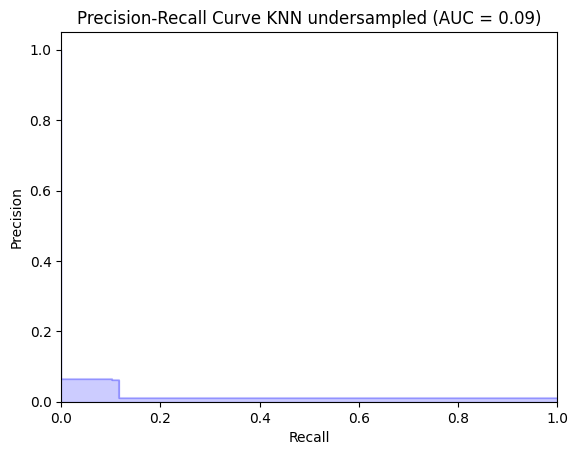

Area Under the Curve KNN undersampled (AUC): 0.0869


In [ ]:
precision, recall, _ = precision_recall_curve(y_valid, best_dt_classifier.predict_proba(X_valid_transformed)[:, 1])
auc_score = auc(recall, precision)

# Plot the precision-recall curve
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall Curve KNN smote (AUC = {auc_score:.2f})')
plt.show()

print(f"Area Under the Curve KNN smote  (AUC): {auc_score:.4f}")

In [ ]:
###best sampling for DT (stratified undersampling) + transactional data
X_train_resampled = pd.read_csv('X_train_undersampled_str_trans.csv')
X_valid_transformed = pd.read_csv('X_valid_transformed_basic_trans.csv')
X_test_transformed = pd.read_csv('X_test_transformed_basic_trans.csv')

y_train_resampled = pd.read_csv('y_train_undersampled_str_trans.csv')
y_valid = pd.read_csv('y_valid_basic_trans.csv')
y_test = pd.read_csv('y_test_basic_trans.csv')
y_train_resampled = np.ravel(y_train_resampled.values)
y_valid = np.ravel(y_valid.values)
y_test = np.ravel(y_test.values)



In [ ]:
#convert arrays to pandas df
X_train_df = pd.DataFrame(X_train_resampled)
X_valid_df = pd.DataFrame(X_valid_transformed)

#get the columns/features of each dataset
features_train = set(X_train_df.columns)
features_valid = set(X_valid_df.columns)

#check if the features are the same
if features_train == features_valid:
    print("Number of features is the same in training and validation sets.")
else:
    print("Number of features is different in training and validation sets.")


Number of features is the same in training and validation sets.


In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42)

#parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'] #auto is deprecated
}

random_search = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=5,
    cv=3,
    scoring='f1_macro',
    verbose=2,
    random_state=42
)

random_search.fit(X_train_resampled, y_train_resampled)

# Step 4: Print the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters DT stratified undersampling:", best_params)

# Step 5: Train the Decision Tree classifier with the best hyperparameters
best_dt_classifier = DecisionTreeClassifier(**best_params, random_state=42)
best_dt_classifier.fit(X_train_resampled, y_train_resampled)

# Step 6: Evaluate the classifier on the test set
y_pred = best_dt_classifier.predict(X_valid_transformed)

#save model to a file
#joblib.dump(best_dt_classifier, 'dt_stratified_undersampling.pkl')

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_sp

In [ ]:
f1 = f1_score(y_valid, y_pred, average = "macro")
print(f"F1 Score: {f1:.4f}")

f1 = f1_score(y_valid, y_pred, average = "weighted")
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.4404
F1 Score: 0.8189


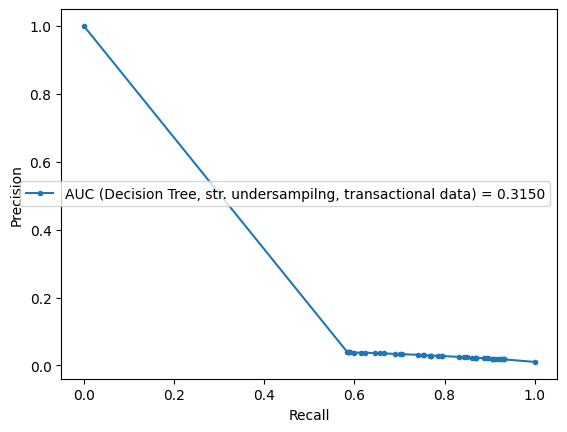

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Assuming y_valid and probabilities are available
y_valid =  y_valid
probabilities = best_dt_classifier.predict_proba(X_valid_transformed)[:, 1]  # Probabilities of the positive class

# Calculate the "No Skill" precision

# Calculate precision-recall pairs
precision_dt, recall_dt, _ = precision_recall_curve(y_valid, probabilities)
auc_dt = auc(recall_dt, precision_dt)

# Plot the precision-recall curve

plt.plot(recall_dt, precision_dt, marker=".", label=f"AUC (Decision Tree, str. undersampilng, transactional data) = {auc_dt:.4f}")

# Axis labels
plt.xlabel("Recall")
plt.ylabel("Precision")

# Show the legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
##confusion matrix & classification report
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred))

print("\nClassification Report:")
print(classification_report(y_valid, y_pred))

Confusion Matrix:
[[111868  46456]
 [   345   1331]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83    158324
           1       0.03      0.79      0.05      1676

    accuracy                           0.71    160000
   macro avg       0.51      0.75      0.44    160000
weighted avg       0.99      0.71      0.82    160000



In [ ]:
class_report = classification_report(y_valid, y_pred)

# Print F1 scores per class
for line in class_report.split('\n')[2:-1]:
    row = line.split()
    if len(row) > 1:
        class_label = row[0]
        f1 = float(row[-2])
        print(f"Class {class_label}: F1 Score = {f1:.2f}")

Class 0: F1 Score = 0.83
Class 1: F1 Score = 0.05
Class accuracy: F1 Score = 0.71
Class macro: F1 Score = 0.44
Class weighted: F1 Score = 0.82


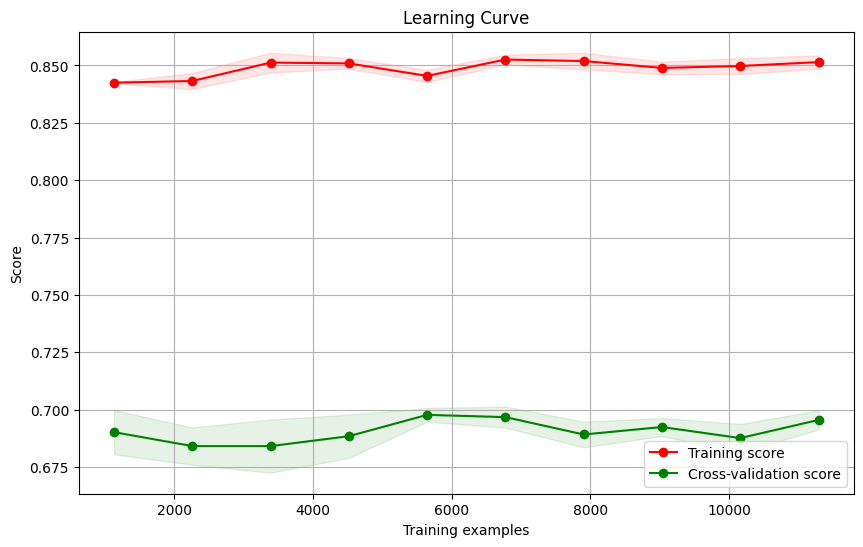

In [ ]:
train_sizes = np.linspace(0.1, 1.0, 10)
scoring = "f1_macro"
plot_learning_curve(best_dt_classifier, X_train_resampled, y_train_resampled, scoring, train_sizes)

In [ ]:
###stratified undersampling DT is overfitting -> prune the tree
##train the dt classifier with relaxed hyperparameters
#Best Hyperparameters DT stratified undersampling: {'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'entropy'}

#the best hyperparameters from the hyperparameter tuning
best_hyperparameters = {'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2', 'criterion': 'entropy'}

##prune the tree further by setting max_depth to a smaller value
pruned_max_depth = 100
pruned_dt_classifier = DecisionTreeClassifier(max_depth=pruned_max_depth, **best_hyperparameters, random_state=42)
pruned_dt_classifier.fit(X_train_resampled, y_train_resampled)

# Evaluate the pruned classifier on the validation set
y_pred_pruned = pruned_dt_classifier.predict(X_valid_transformed)

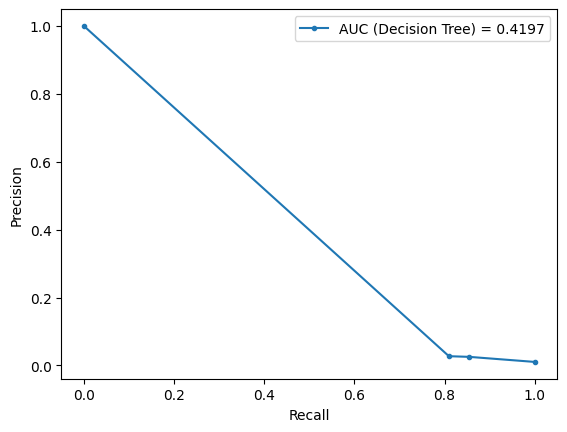

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Assuming y_valid and probabilities are available
y_valid =  y_valid
probabilities = pruned_dt_classifier.predict_proba(X_valid_transformed)[:, 1]  # Probabilities of the positive class

# Calculate the "No Skill" precision

# Calculate precision-recall pairs
precision_dt, recall_dt, _ = precision_recall_curve(y_valid, probabilities)
auc_dt = auc(recall_dt, precision_dt)

# Plot the precision-recall curve

plt.plot(recall_dt, precision_dt, marker=".", label=f"AUC (Decision Tree) = {auc_dt:.4f}")

# Axis labels
plt.xlabel("Recall")
plt.ylabel("Precision")

# Show the legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
f1 = f1_score(y_valid, y_pred_pruned, average = "macro")
print(f"F1 Score: {f1:.4f}")

f1 = f1_score(y_valid, y_pred_pruned, average = "weighted")
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.4360
F1 Score: 0.8110


In [ ]:
##confusion matrix & classification report
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred_pruned))

print("\nClassification Report:")
print(classification_report(y_valid, y_pred_pruned))

Confusion Matrix:
[[110023  48301]
 [   319   1357]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.69      0.82    158324
           1       0.03      0.81      0.05      1676

    accuracy                           0.70    160000
   macro avg       0.51      0.75      0.44    160000
weighted avg       0.99      0.70      0.81    160000



In [ ]:
class_report = classification_report(y_valid, y_pred_pruned)

# Print F1 scores per class
for line in class_report.split('\n')[2:-1]:
    row = line.split()
    if len(row) > 1:
        class_label = row[0]
        f1 = float(row[-2])
        print(f"Class {class_label}: F1 Score = {f1:.2f}")

Class 0: F1 Score = 0.82
Class 1: F1 Score = 0.05
Class accuracy: F1 Score = 0.70
Class macro: F1 Score = 0.44
Class weighted: F1 Score = 0.81


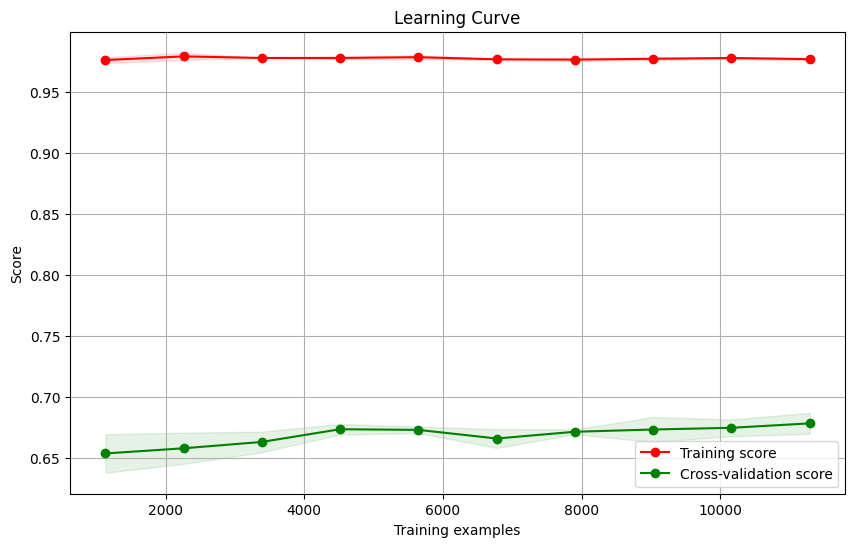

In [ ]:
train_sizes = np.linspace(0.1, 1.0, 10)
scoring = "f1_macro"
plot_learning_curve(pruned_dt_classifier, X_train_resampled, y_train_resampled, scoring, train_sizes)

In [ ]:
#transactional data
X_train_resampled = pd.read_csv('X_train_transformed_basic_trans.csv')
X_valid_transformed = pd.read_csv('X_valid_transformed_basic_trans.csv')
X_test_transformed = pd.read_csv('X_test_transformed_basic_trans.csv')

y_train_resampled = pd.read_csv('y_train_basic_trans.csv')
y_valid = pd.read_csv('y_valid_basic_trans.csv')
y_test = pd.read_csv('y_test_basic_trans.csv')
y_train_resampled = np.ravel(y_train_resampled.values)
y_valid = np.ravel(y_valid.values)
y_test = np.ravel(y_test.values)



In [ ]:
##no sampling with class weight
#calc the weight for the positive class (#1)
#inv of the proportion of positive cases in the dataset
weight_positive = 1 / 0.011  # 1/0.011 = 90.91
 #set the class weights
class_weights = {0: 1, 1: weight_positive}
dt_classifier = DecisionTreeClassifier(class_weight=class_weights, random_state=42)

# Step 2: Define the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

random_search.fit(X_train_undersampled, y_train_undersampled)

# Step 4: Print the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters DT ADASYN w/class weights:", best_params)


# Step 5: Train the Decision Tree classifier with the best hyperparameters
best_dt_classifier = DecisionTreeClassifier(**best_params, random_state=42)
best_dt_classifier.fit(X_train_resampled, y_train_resampled)

# Step 6: Evaluate the classifier on the test set
y_pred = best_dt_classifier.predict(X_valid_transformed)

#save model to a file
joblib.dump(best_dt_classifier, 'dt_basicn_classweights1.pkl')


In [5]:
###generalization - str. undersampling decision tree on full data, test set
###out-of-sample generalization: best model making predictions on the test set
X_test_transformed = pd.read_csv('X_test_transformed_basicfull.csv')
y_test = pd.read_csv('y_test_basicfull.csv')
y_test = np.ravel(y_test.values)
##load model
best_dt = joblib.load('dt_stratified_undersampling.pkl')
##y_pred

In [6]:
y_pred = best_dt.predict(X_test_transformed)

In [7]:
f1 = f1_score(y_test, y_pred, average = "macro")
print(f"F1 Score: {f1:.4f}")

f1 = f1_score(y_test, y_pred, average = "weighted")
print(f"F1 Score: {f1:.4f}")

##confusion matrix & classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

F1 Score: 0.4461
F1 Score: 0.8242
Confusion Matrix:
[[141406  56388]
 [   413   1793]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83    197794
           1       0.03      0.81      0.06      2206

    accuracy                           0.72    200000
   macro avg       0.51      0.76      0.45    200000
weighted avg       0.99      0.72      0.82    200000



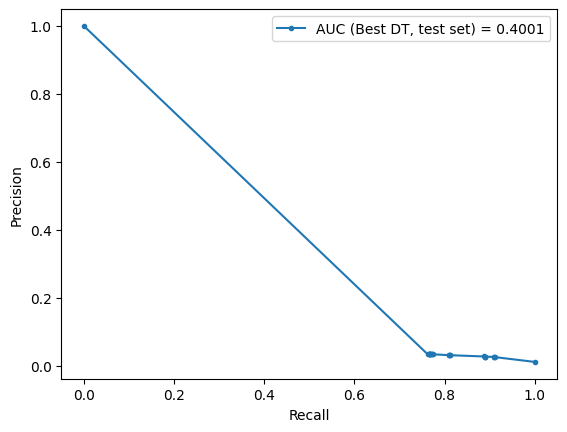

In [8]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Assuming y_valid and probabilities are available
#y_valid =  y_valid
probabilities = best_dt.predict_proba(X_test_transformed)[:, 1]  # Probabilities of the positive class

# Calculate the "No Skill" precision

# Calculate precision-recall pairs
precision_dt, recall_dt, _ = precision_recall_curve(y_test, probabilities)
auc_dt = auc(recall_dt, precision_dt)

# Plot the precision-recall curve

plt.plot(recall_dt, precision_dt, marker=".", label=f"AUC (Best DT, test set) = {auc_dt:.4f}")

# Axis labels
plt.xlabel("Recall")
plt.ylabel("Precision")

# Show the legend
plt.legend()

# Show the plot
plt.show()
